In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [23]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since the image is flattend, we will reshape it into 2D format. Each row is flattend version of 28 * 28. I am reshaping the image because I will be using tensorflow. You can use other models and based on the requirements reshape your data accordingly

In [24]:
features = df.iloc[:, 1:]
features

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
labels = df.iloc[:, 0]
labels

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [26]:
features.shape, labels.shape

((42000, 784), (42000,))

In [27]:
image = features.iloc[0].values.reshape(28, 28)
image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

In [28]:
images = features.values.reshape(-1, 28, 28, 1)  # the last 1 is for the channel, and tensorflow compatibility

### Prepare The Data For The Model

In [29]:
# let's split the dataset for the training purpose
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size= 0.2,random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(33600, 28, 28, 1) (33600,) (8400, 28, 28, 1) (8400,)


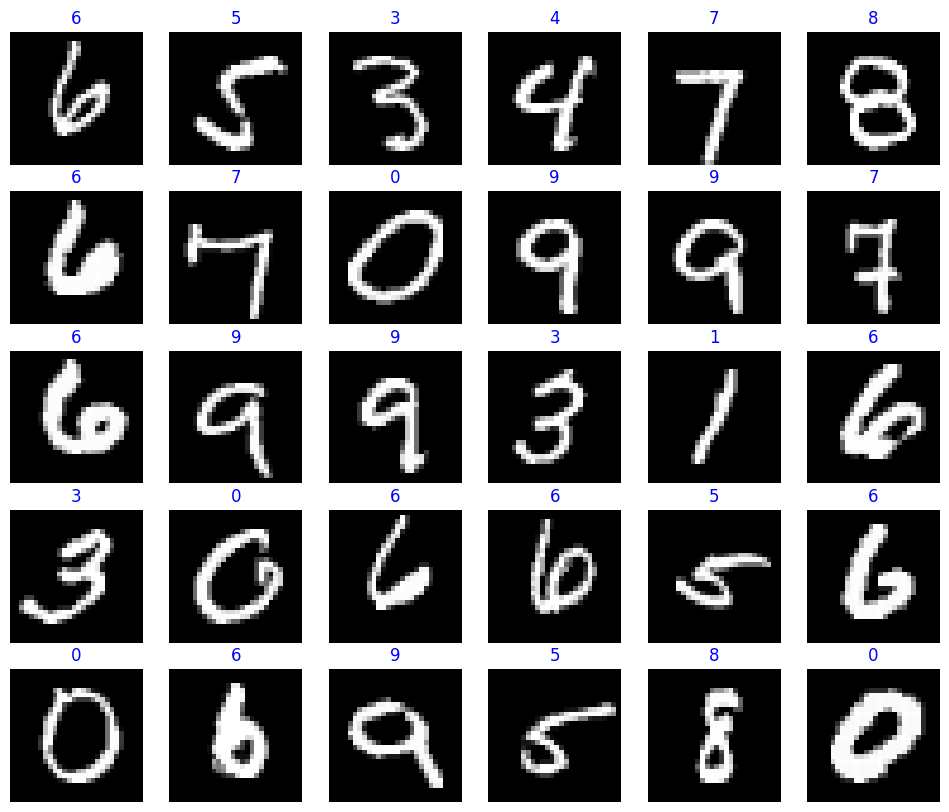

In [30]:
fig, axes = plt.subplots(5, 6, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap="gray")
    ax.set_title(y_train.iloc[i], fontsize=12, color='blue')
    ax.axis("off")
    ax.grid(True)

In [31]:
# conver images to tensors
X_train_tensors = tf.convert_to_tensor(X_train, dtype = tf.float32)
X_test_tensors = tf.convert_to_tensor(X_test, dtype = tf.float32)

# please use int  for labels float works too but use int)
y_train_tensors = tf.convert_to_tensor(y_train, dtype = tf.float32) 
y_test_tensors = tf.convert_to_tensor(y_test, dtype = tf.float32)

In [32]:
# for efficiency purpose we are going to use tf.data.dataset api
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tensors, y_train_tensors))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tensors, y_test_tensors))

In [33]:
# normalize images before feeding it to neural nets
def image_normalizer(image, label):
    return image/ 255.0, label

# apply normalizer to each image and do some other preprocessing for efficiency purpose
train_dataset = train_dataset.map(image_normalizer).batch(32).shuffle(buffer_size = 1000).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.map(image_normalizer).batch(32).shuffle(buffer_size = 1000).prefetch(tf.data.AUTOTUNE)

In [73]:
for images, labels in train_dataset.take(1):
    print(labels)

tf.Tensor(
[3. 0. 1. 3. 3. 5. 4. 5. 6. 1. 3. 5. 7. 0. 1. 5. 3. 6. 3. 8. 5. 4. 5. 7.
 5. 4. 4. 5. 8. 4. 6. 1.], shape=(32,), dtype=float32)


## Building Models

In [35]:
inputs = keras.layers.Input(shape=(28, 28, 1))
x = keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu", padding = "same")(inputs)
x = keras.layers.MaxPooling2D(2)(x)
x = keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu", padding = "same")(x)
x = keras.layers.MaxPooling2D(2)(x)
x = keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu", padding = "same")(x)
x = keras.layers.MaxPooling2D(2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(10, activation = "softmax")(x)
model = keras.Model(inputs, outputs)
model.summary()                        

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,266 (313.54 KB)

 Trainable params: 80,266 (313.54 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(train_dataset, validation_data=test_dataset, epochs=10)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 36ms/step - accuracy: 0.8308 - loss: 0.5280 - val_accuracy: 0.9818 - val_loss: 0.0620
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 35ms/step - accuracy: 0.9772 - loss: 0.0730 - val_accuracy: 0.9776 - val_loss: 0.0646
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 36ms/step - accuracy: 0.9847 - loss: 0.0493 - val_accuracy: 0.9882 - val_loss: 0.0360
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 35ms/step - accuracy: 0.9875 - loss: 0.0387 - val_accuracy: 0.9861 - val_loss: 0.0444
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 37ms/step - accuracy: 0.9905 - loss: 0.0293 - val_accuracy: 0.9898 - val_loss: 0.0347
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 35ms/step - accuracy: 0.9921 - loss: 0.0248 - val_accuracy: 0.9900 - val_loss: 0.0314
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 36ms/step - accuracy: 0.9924 - loss: 0.0229 - val_accuracy: 0.9886 - val_loss: 0.0329
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 36ms/step - accuracy: 0.9934 -

In [37]:
model.evaluate(test_dataset)

263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9924 - loss: 0.0302


[0.03215136006474495, 0.9907143115997314]

We will use a dual input model with keras to see the performanc improves

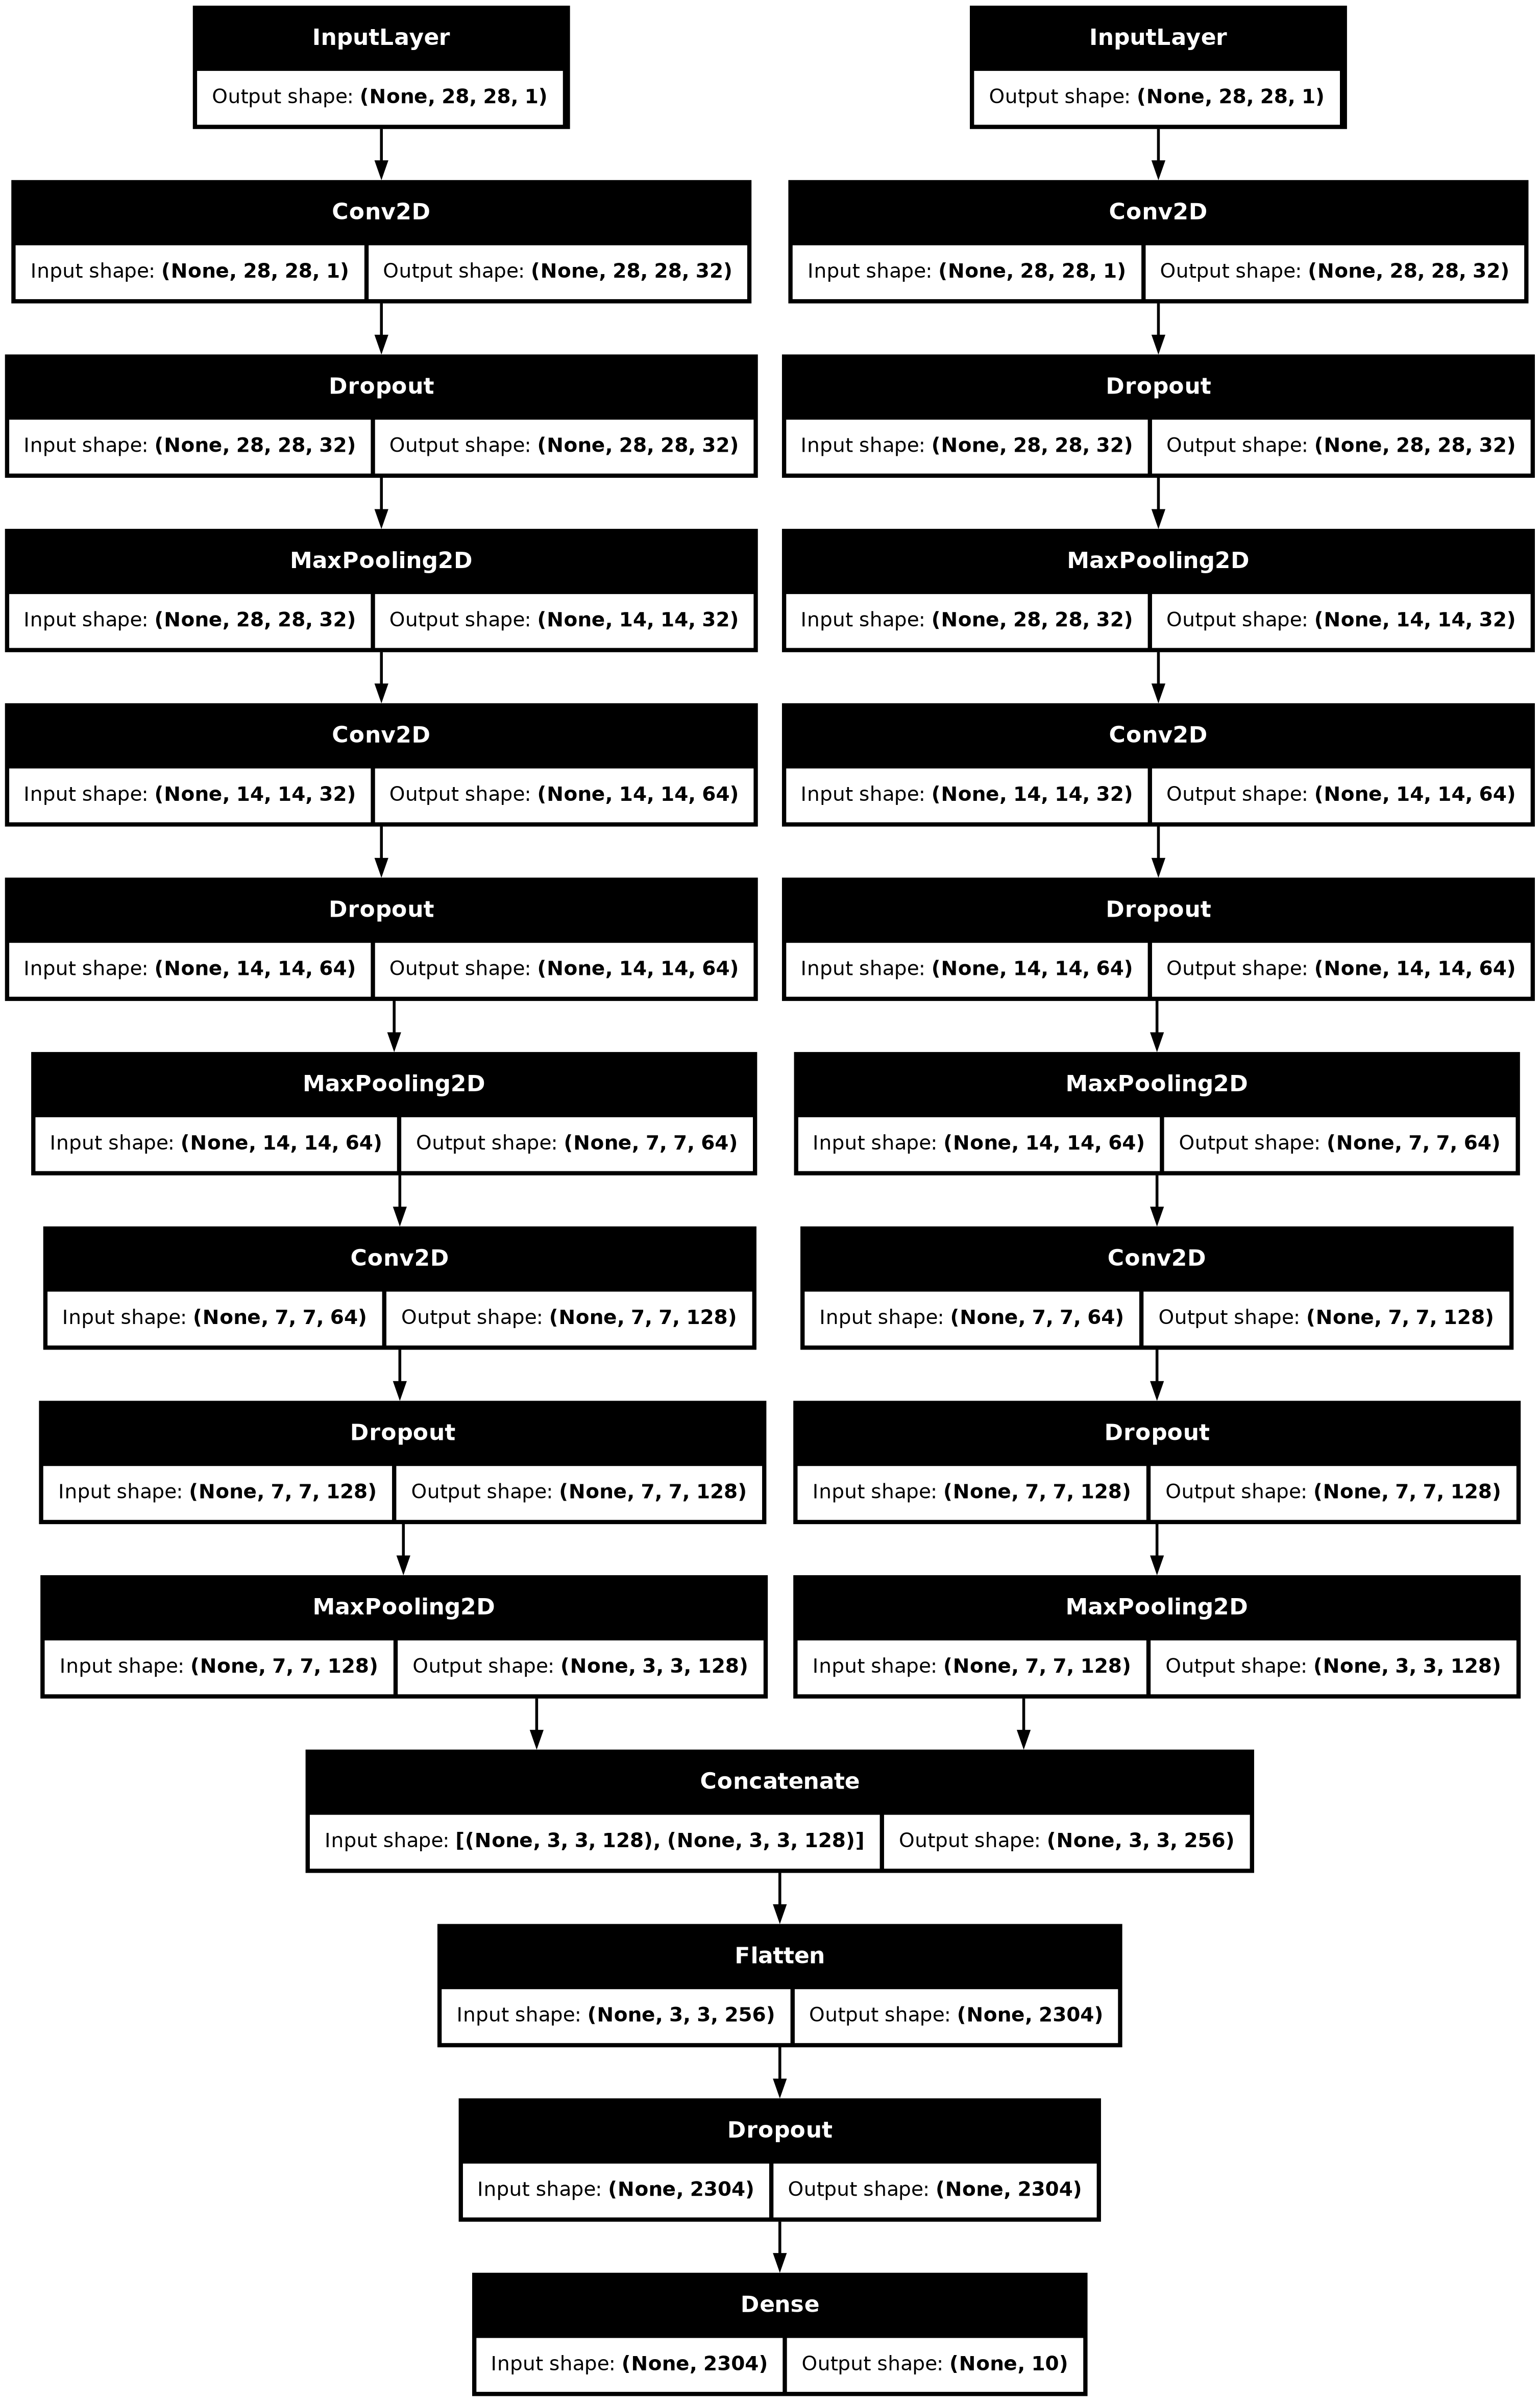

In [49]:
left_inputs = keras.layers.Input(shape = (28, 28, 1))
x = left_inputs
left_filters = 32

for i in range(3):
    x = keras.layers.Conv2D(filters = left_filters, kernel_size = 3, padding = "same", activation = "relu")(x)
    x = keras.layers.Dropout(0.4)(x)
    x = keras.layers.MaxPool2D()(x)
    left_filters *= 2


right_inputs = keras.layers.Input(shape = (28, 28, 1))
y = right_inputs
right_filters = 32

for i in range(3):
    y = keras.layers.Conv2D(filters = right_filters, kernel_size = 3, padding = "same", activation = "relu")(y)
    y = keras.layers.Dropout(0.4)(y)
    y = keras.layers.MaxPool2D()(y)
    right_filters *= 2

z = keras.layers.concatenate([x, y])
z = keras.layers.Flatten()(z)
z = keras.layers.Dropout(0.4)(z)
outputs = keras.layers.Dense(10, activation = "softmax")(z)

# build the model
model2 = keras.Model([left_inputs, right_inputs], outputs)

keras.utils.plot_model(model2, show_shapes = True)

In [50]:
model2.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_28      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_29      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_83 (Conv2D)  │ (None, 28, 28,    │        320 │ input_layer_28[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_86 (Conv2D)  │ (None, 28, 28,    │        320 │ input_layer_29[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_81          │ (None, 28, 28,    │          0 │ conv2d_83[0][0]   │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_84          │ (None, 28, 28,    │          0 │ conv2d_86[0][0]   │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_83    │ (None, 14, 14,    │          0 │ dropout_81[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_86    │ (None, 14, 14,    │          0 │ dropout_84[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_84 (Conv2D)  │ (None, 14, 14,    │     18,496 │ max_pooling2d_83… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_87 (Conv2D)  │ (None, 14, 14,    │     18,496 │ max_pooling2d_86… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_82          │ (None, 14, 14,    │          0 │ conv2d_84[0][0]   │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_85          │ (None, 14, 14,    │          0 │ conv2d_87[0][0]   │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_84    │ (None, 7, 7, 64)  │          0 │ dropout_82[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_87    │ (None, 7, 7, 64)  │          0 │ dropout_85[0][0]  │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_85 (Conv2D)  │ (None, 7, 7, 128) │     73,856 │ max_pooling2d_84… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_88 (Conv2D)  │ (None, 7, 7, 128) │     73,856 │ max_pooling2d_87… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_83          │ (None, 7, 7, 128) │          0 │ conv2d_85[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 208,394 (814.04 KB)

 Trainable params: 208,394 (814.04 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# refactor the the dataset for expected input

new_train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tensors, y_train_tensors))
new_test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tensors, y_test_tensors))

new_train_dataset = new_train_dataset.map(lambda input, label: ((input / 255.0, input / 255.0), label))
new_test_dataset = new_test_dataset.map(lambda input, label: ((input / 255.0, input / 255.0), label))

new_train_dataset = new_train_dataset.batch(32).shuffle(buffer_size = 1000).prefetch(tf.data.AUTOTUNE)
new_test_dataset = new_test_dataset.batch(32).shuffle(buffer_size = 1000).prefetch(tf.data.AUTOTUNE)

In [70]:
for data, labels in new_train_dataset.take(1):
    print(data[0].shape)  
    print(labels.shape)

(32, 28, 28, 1)
(32,)


In [77]:
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    'best_model_mnist_conv2d.keras',             
    monitor='val_loss',          
    save_best_only=True,         
    mode='min',                   
    verbose=1 
)

model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model2.fit(new_train_dataset, validation_data=new_test_dataset, epochs=20, callbacks = [checkpoint_callback])

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9902 - loss: 0.0334
Epoch 1: val_loss improved from inf to 0.04350, saving model to best_model_mnist_conv2d.keras
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 67s 61ms/step - accuracy: 0.9902 - loss: 0.0334 - val_accuracy: 0.9895 - val_loss: 0.0435
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9888 - loss: 0.0349
Epoch 2: val_loss improved from 0.04350 to 0.03694, saving model to best_model_mnist_conv2d.keras
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 66s 63ms/step - accuracy: 0.9888 - loss: 0.0349 - val_accuracy: 0.9914 - val_loss: 0.0369
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9898 - loss: 0.0329
Epoch 3: val_loss did not improve from 0.03694
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 65s 61ms/step - accuracy: 0.9898 - loss: 0.0329 - val_accuracy: 0.9913 - val_loss: 0.0439
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9897 - loss: 0.0331
Epoch 4: val_loss did not improve from 0.0

In [79]:
final_model = tf.keras.models.load_model("/kaggle/working/best_model_mnist_conv2d.keras")
final_model.evaluate(new_test_dataset)

263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9942 - loss: 0.0281


[0.02950003556907177, 0.9933333396911621]

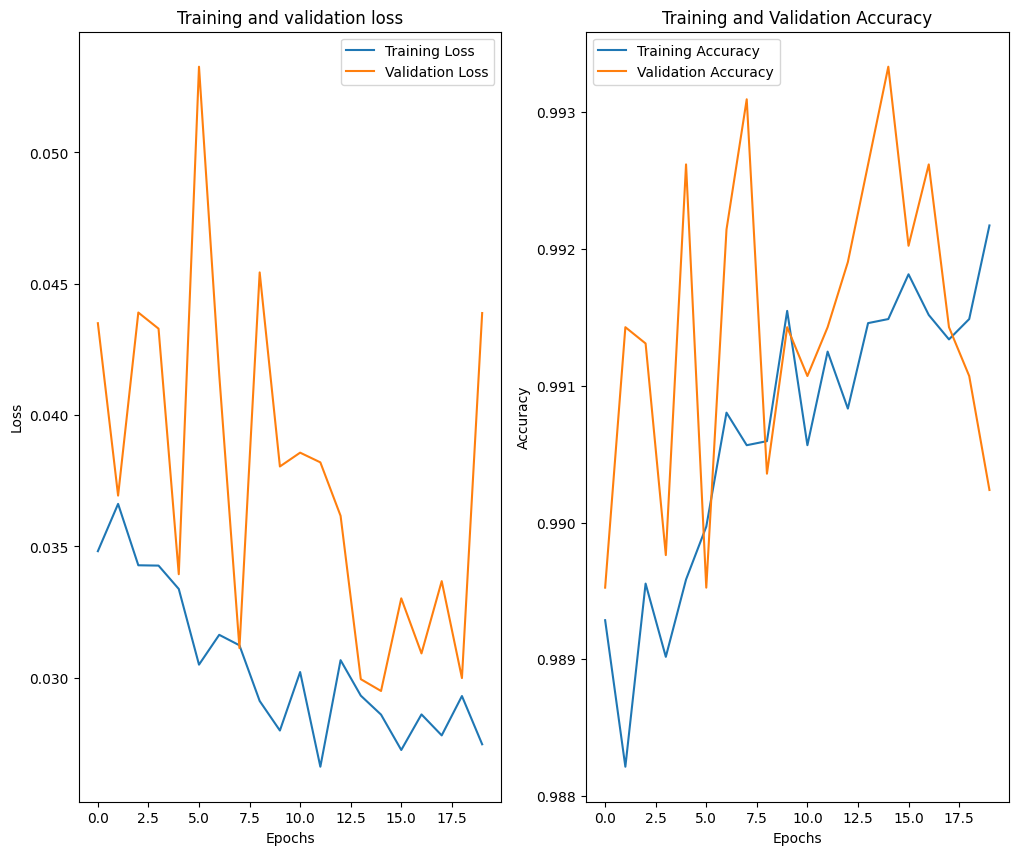

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

axes[0].plot(history.history["loss"], label = "Training Loss")
axes[0].plot(history.history["val_loss"], label = "Validation Loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Training Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Training and Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.show()

In [87]:
predictions = final_model.predict(new_test_dataset)  # these prediction probabilities array for each digit 
predictions

263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


array([[9.9977469e-01, 1.1645549e-09, 4.3332144e-05, ..., 4.0431539e-07,
        1.5790276e-05, 8.5384374e-05],
       [9.9755925e-06, 7.6302253e-09, 1.2031954e-07, ..., 4.7351373e-10,
        2.7121903e-05, 3.3657224e-07],
       [1.7953851e-05, 2.5235054e-03, 9.9530357e-01, ..., 1.4013231e-03,
        9.3430936e-05, 1.3234308e-04],
       ...,
       [2.9912986e-08, 3.5456841e-07, 3.0594446e-08, ..., 1.1908401e-07,
        5.2974351e-06, 2.4174703e-06],
       [1.0614631e-04, 9.9676925e-01, 9.6924407e-05, ..., 6.6152547e-04,
        1.5090707e-04, 2.0762827e-04],
       [9.9989134e-01, 2.4476807e-09, 7.7214299e-06, ..., 2.1334418e-07,
        8.6528953e-06, 5.3368691e-05]], dtype=float32)

In [88]:
# get the maxmium value from the array
predicted_classes = np.argmax(predictions, -1)  # -1 for the last axis or the row of above matrix
predicted_classes

array([0, 6, 2, ..., 5, 1, 0])

In [115]:
predictions.shape

(8400, 10)

### Analyse A Batch For The Model Predictions

In [152]:
batch_images, batch_labels = next(iter(new_test_dataset))
predictions = final_model.predict((batch_images[0], batch_images[0]))  # use the same format the way model expects the data

print(batch_images[0].shape, batch_labels.shape, predictions.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
(32, 28, 28, 1) (32,) (32, 10)


In [154]:
predicted_labels = np.argmax(predictions, axis=-1)
predicted_labels.shape
predicted_labels

array([3, 8, 1, 6, 4, 6, 1, 2, 5, 0, 6, 3, 8, 3, 8, 2, 9, 2, 7, 9, 0, 7,
       7, 1, 2, 9, 9, 5, 4, 5, 4, 5])

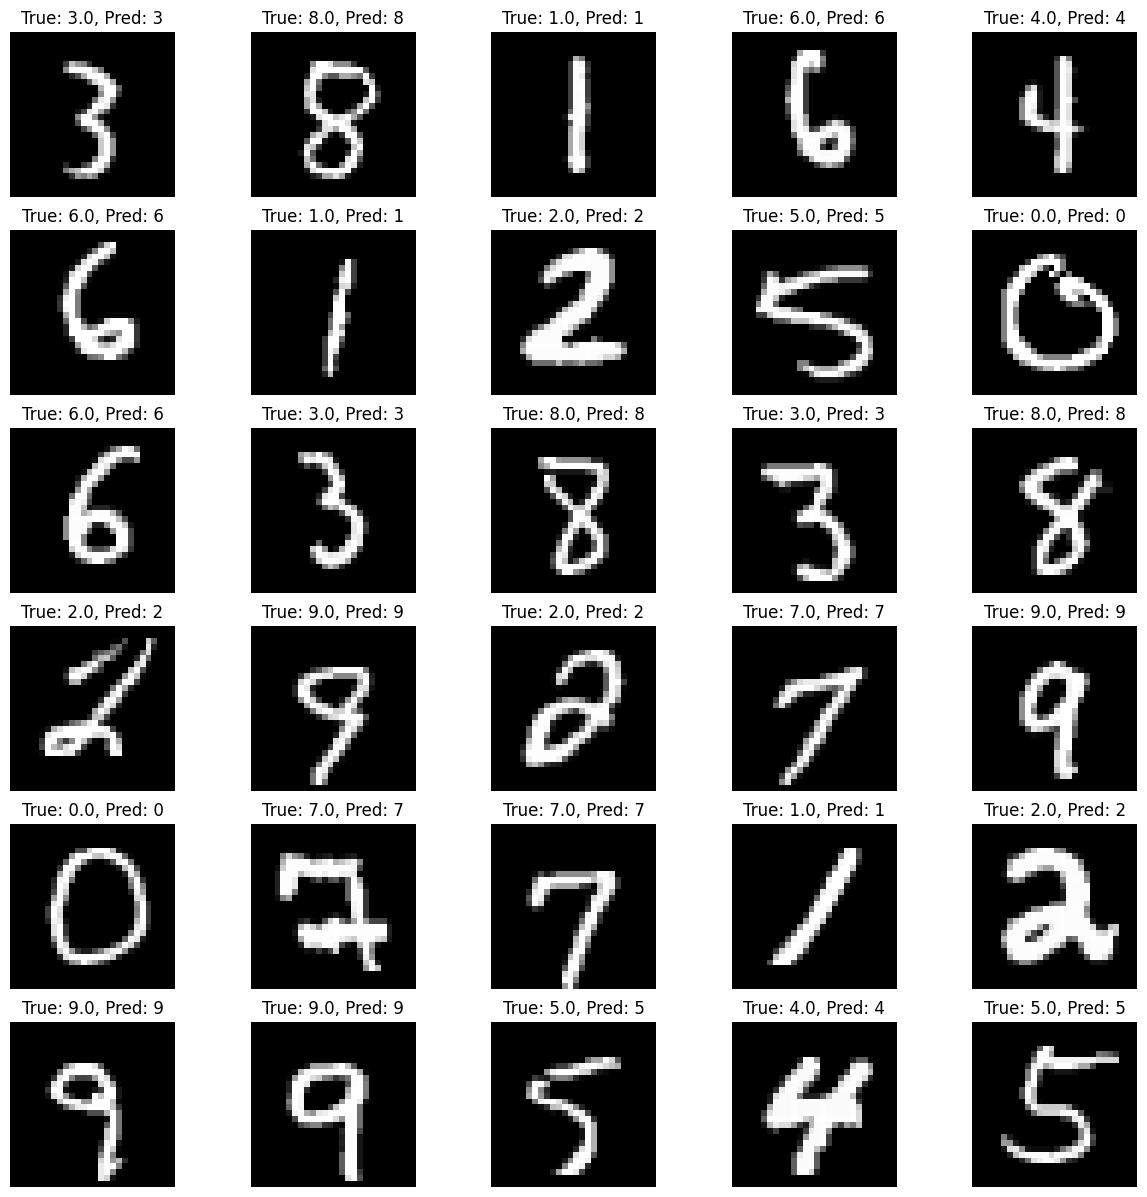

In [157]:
fig, axes = plt.subplots(6, 5, figsize=(15, 15)) 
axes = axes.flatten() 

for i in range(30):
    ax = axes[i]
    ax.imshow(batch_images[0][i].numpy().reshape(28, 28), cmap='gray')
    true_label = batch_labels[i].numpy()
    pred_label = predicted_labels[i] 
    ax.set_title(f'True: {true_label}, Pred: {pred_label}')
    ax.axis('off')

plt.show()

### Do The Final Prediction On Final Test Data Without Labels

In [167]:
test_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
# preprocessing the data in the same manner the way model expects

test_images = test_df.values.reshape(-1, 28, 28, 1).astype("float32")
test_images_tensors = tf.convert_to_tensor(test_images, dtype=tf.float32)
final_test_dataset = tf.data.Dataset.from_tensor_slices(test_images_tensors)
final_test_dataset = final_test_dataset.map(lambda input: ((input / 255.0, input / 255.0),))  # don't miss comma here
final_test_dataset = final_test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


final_predictions = final_model.predict(final_test_dataset)
final_predicted_labels = np.argmax(final_predictions, axis=1) # converting to labels

# preparing the data for final submission 
submission_df = pd.DataFrame({
    'ImageId': np.arange(1, len(final_predicted_labels) + 1),
    'Label': final_predicted_labels
})


submission_df.to_csv('submission.csv', index=False)
print("Done")

875/875 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step
Done
